In [1]:
# Importing Necessary Libraries
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
# Loading the Dataset
df = pd.read_csv('Kerala_election_2021.csv')

In [3]:
df

,CONSTITUENCY,DISTRICT,LDF,UDF,NDA,NOTA,OTHERS,EVM VOTES,POSTAL VOTES,TOTAL VOTES,LEAD,WINNER,%LDF,%UDF,%NDA,%NOTA,%POSTAL,%LEAD
0,Alappuzha,Alappuzha,73412,61768,21650,1089,527,154149,4297,158446,11644,LDF,46.332504,38.983628,13.663961,0.687300,2.711965,7.348876
1,Ambalapuzha,Alappuzha,61365,50240,22389,591,2436,133382,3639,137021,11125,LDF,44.785106,36.665913,16.339831,0.431321,2.655797,8.119193
2,Aroor,Alappuzha,75617,68604,17479,846,1945,160851,3640,164491,7013,LDF,45.970296,41.706841,10.626113,0.514314,2.212887,4.263455
3,Chengannur,Alappuzha,71502,39409,34620,491,1149,142958,4213,147171,32093,LDF,48.584300,26.777694,23.523656,0.333626,2.862656,21.806606
4,Cherthala,Alappuzha,83702,77554,14562,602,1677,172214,5883,178097,6148,LDF,46.997984,43.545933,8.176443,0.338018,3.303256,3.452051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,Thrissur,Thrissur,44263,43317,40457,723,477,125832,3405,129237,946,LDF,34.249480,33.517491,31.304503,0.559437,2.634694,0.731989
136,Wadakkancheri,Thrissur,81026,65858,21747,842,388,165920,3941,169861,15168,LDF,47.701356,38.771702,12.802821,0.495699,2.320132,8.929654
137,Kalpetta,Wayanad,64782,70252,14113,828,2234,149111,3098,152209,5470,UDF,42.561215,46.154958,9.272119,0.543989,2.035359,3.593743
138,Mananthavadi,Wayanad,72536,63254,13142,797,2852,149053,3528,152581,9282,LDF,47.539340,41.456014,8.613130,0.522346,2.312214,6.083326


In [4]:
# Checking the Null Values
df.isnull().sum()

CONSTITUENCY    0
DISTRICT        0
LDF             0
UDF             0
NDA             0
NOTA            0
OTHERS          0
EVM VOTES       0
POSTAL VOTES    0
TOTAL VOTES     0
LEAD            0
WINNER          0
%LDF            0
%UDF            0
%NDA            0
%NOTA           0
%POSTAL         0
%LEAD           0
dtype: int64

In [5]:
#Converting categorical data into Numerical data
var = pd.get_dummies(df.CONSTITUENCY, prefix='CONSTITUENCY')
var1 = pd.get_dummies(df.DISTRICT, prefix='DISTRICT')
var2 = pd.get_dummies(df.WINNER, prefix='WINNER')
New_dataset = pd.concat([var, var1, var2, df],axis='columns')

In [6]:
# Droping the text column
New_dataset.drop('CONSTITUENCY', axis='columns', inplace=True)
New_dataset.drop('DISTRICT', axis='columns', inplace=True)
New_dataset.drop('WINNER', axis='columns', inplace=True)


In [7]:
# Checking New_Dataset first five rows
New_dataset.head()

,CONSTITUENCY_Adoor,CONSTITUENCY_Alappuzha,CONSTITUENCY_Alathur,CONSTITUENCY_Aluva,CONSTITUENCY_Ambalapuzha,CONSTITUENCY_Angamaly,CONSTITUENCY_Aranmula,CONSTITUENCY_Aroor,CONSTITUENCY_Aruvikkara,CONSTITUENCY_Attingal,CONSTITUENCY_Azhikode,CONSTITUENCY_Balusseri,CONSTITUENCY_Beypore,CONSTITUENCY_Chadayamangalam,CONSTITUENCY_Chalakkudi,CONSTITUENCY_Changanasseri,CONSTITUENCY_Chathannur,CONSTITUENCY_Chavara,CONSTITUENCY_Chelakkara,CONSTITUENCY_Chengannur,CONSTITUENCY_Cherthala,CONSTITUENCY_Chirayattinkeezhu,CONSTITUENCY_Chittur,CONSTITUENCY_Devikulam,CONSTITUENCY_Dharmadam,CONSTITUENCY_Elathur,CONSTITUENCY_Eranadu,CONSTITUENCY_Eravipuram,CONSTITUENCY_Ernakulam,CONSTITUENCY_Ettumanoor,CONSTITUENCY_Guruvayoor,CONSTITUENCY_Haripad,CONSTITUENCY_Idukki,CONSTITUENCY_Irikkoor,CONSTITUENCY_Irinjalakkuda,CONSTITUENCY_Kaduthuruthy,CONSTITUENCY_Kaipamangalam,CONSTITUENCY_Kalamassery,CONSTITUENCY_Kalliassery,CONSTITUENCY_Kalpetta,...,CONSTITUENCY_Vaikom,CONSTITUENCY_Vallikkunnu,CONSTITUENCY_Vamanapuram,CONSTITUENCY_Varkala,CONSTITUENCY_Vattiyoorkkavu,CONSTITUENCY_Vengara,CONSTITUENCY_Vypin,CONSTITUENCY_Wadakkancheri,CONSTITUENCY_Wandoor,DISTRICT_Alappuzha,DISTRICT_Ernakulam,DISTRICT_Idukki,DISTRICT_Kannur,DISTRICT_Kasargode,DISTRICT_Kollam,DISTRICT_Kottayam,DISTRICT_Kozhikode,DISTRICT_Malappuram,DISTRICT_Palakkad,DISTRICT_Pathanamthitta,DISTRICT_Thiruvananthapuram,DISTRICT_Thrissur,DISTRICT_Wayanad,WINNER_LDF,WINNER_UDF,LDF,UDF,NDA,NOTA,OTHERS,EVM VOTES,POSTAL VOTES,TOTAL VOTES,LEAD,%LDF,%UDF,%NDA,%NOTA,%POSTAL,%LEAD
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,73412,61768,21650,1089,527,154149,4297,158446,11644,46.332504,38.983628,13.663961,0.687300,2.711965,7.348876
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,61365,50240,22389,591,2436,133382,3639,137021,11125,44.785106,36.665913,16.339831,0.431321,2.655797,8.119193
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,75617,68604,17479,846,1945,160851,3640,164491,7013,45.970296,41.706841,10.626113,0.514314,2.212887,4.263455
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,71502,39409,34620,491,1149,142958,4213,147171,32093,48.584300,26.777694,23.523656,0.333626,2.862656,21.806606
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,83702,77554,14562,602,1677,172214,5883,178097,6148,46.997984,43.545933,8.176443,0.338018,3.303256,3.452051


In [8]:
# Seprating fetures X
X = New_dataset.iloc[:,:-1]
X

,CONSTITUENCY_Adoor,CONSTITUENCY_Alappuzha,CONSTITUENCY_Alathur,CONSTITUENCY_Aluva,CONSTITUENCY_Ambalapuzha,CONSTITUENCY_Angamaly,CONSTITUENCY_Aranmula,CONSTITUENCY_Aroor,CONSTITUENCY_Aruvikkara,CONSTITUENCY_Attingal,CONSTITUENCY_Azhikode,CONSTITUENCY_Balusseri,CONSTITUENCY_Beypore,CONSTITUENCY_Chadayamangalam,CONSTITUENCY_Chalakkudi,CONSTITUENCY_Changanasseri,CONSTITUENCY_Chathannur,CONSTITUENCY_Chavara,CONSTITUENCY_Chelakkara,CONSTITUENCY_Chengannur,CONSTITUENCY_Cherthala,CONSTITUENCY_Chirayattinkeezhu,CONSTITUENCY_Chittur,CONSTITUENCY_Devikulam,CONSTITUENCY_Dharmadam,CONSTITUENCY_Elathur,CONSTITUENCY_Eranadu,CONSTITUENCY_Eravipuram,CONSTITUENCY_Ernakulam,CONSTITUENCY_Ettumanoor,CONSTITUENCY_Guruvayoor,CONSTITUENCY_Haripad,CONSTITUENCY_Idukki,CONSTITUENCY_Irikkoor,CONSTITUENCY_Irinjalakkuda,CONSTITUENCY_Kaduthuruthy,CONSTITUENCY_Kaipamangalam,CONSTITUENCY_Kalamassery,CONSTITUENCY_Kalliassery,CONSTITUENCY_Kalpetta,...,CONSTITUENCY_Vadakara,CONSTITUENCY_Vaikom,CONSTITUENCY_Vallikkunnu,CONSTITUENCY_Vamanapuram,CONSTITUENCY_Varkala,CONSTITUENCY_Vattiyoorkkavu,CONSTITUENCY_Vengara,CONSTITUENCY_Vypin,CONSTITUENCY_Wadakkancheri,CONSTITUENCY_Wandoor,DISTRICT_Alappuzha,DISTRICT_Ernakulam,DISTRICT_Idukki,DISTRICT_Kannur,DISTRICT_Kasargode,DISTRICT_Kollam,DISTRICT_Kottayam,DISTRICT_Kozhikode,DISTRICT_Malappuram,DISTRICT_Palakkad,DISTRICT_Pathanamthitta,DISTRICT_Thiruvananthapuram,DISTRICT_Thrissur,DISTRICT_Wayanad,WINNER_LDF,WINNER_UDF,LDF,UDF,NDA,NOTA,OTHERS,EVM VOTES,POSTAL VOTES,TOTAL VOTES,LEAD,%LDF,%UDF,%NDA,%NOTA,%POSTAL
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,73412,61768,21650,1089,527,154149,4297,158446,11644,46.332504,38.983628,13.663961,0.687300,2.711965
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,61365,50240,22389,591,2436,133382,3639,137021,11125,44.785106,36.665913,16.339831,0.431321,2.655797
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,75617,68604,17479,846,1945,160851,3640,164491,7013,45.970296,41.706841,10.626113,0.514314,2.212887
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,71502,39409,34620,491,1149,142958,4213,147171,32093,48.584300,26.777694,23.523656,0.333626,2.862656
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,83702,77554,14562,602,1677,172214,5883,178097,6148,46.997984,43.545933,8.176443,0.338018,3.303256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,44263,43317,40457,723,477,125832,3405,129237,946,34.249480,33.517491,31.304503,0.559437,2.634694
136,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,81026,65858,21747,842,388,165920,3941,169861,15168,47.701356,38.771702,12.802821,0.495699,2.320132
137,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,64782,70252,14113,828,2234,149111,3098,152209,5470,42.561215,46.154958,9.272119,0.543989,2.035359
138,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,72536,63254,13142,797,2852,149053,3528,152581,9282,47.539340,41.456014,8.613130,0.52234

In [9]:
# Seprating fetures y
y = New_dataset.iloc[:,-1]
y

0       7.348876
1       8.119193
2       4.263455
3      21.806606
4       3.452051
         ...    
135     0.731989
136     8.929654
137     3.593743
138     6.083326
139     7.060777
Name: %LEAD, Length: 140, dtype: float64

In [10]:

# Importing 'train_test_split' from sklearn library and spliting data into training and test part.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [11]:
# Imporiting 'Decision Tree Regressor' from sklearn library.

from sklearn.tree import DecisionTreeRegressor

In [12]:
# Creating a class for DecisionTree

model = DecisionTreeRegressor()

In [13]:
# Fitting model with training dataset.

model.fit(X_train, y_train)


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [14]:
# Checking the accuracy of our Model.

model.score(X_test, y_test)

0.9396136738648831

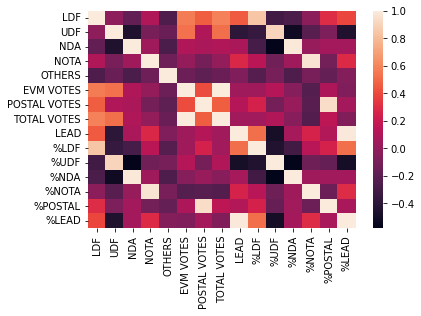

In [15]:
# Checking the Correalation between available column in dataset using heatmap (seaborn).

corr =df.corr()
sns.heatmap(corr)